## 1. Load the gpx data

In [1]:
# gpx_file_path = "data/31_Mar_2025_10_30_57.gpx"
# gpx_file_path = "data/2024-10-17_13_02_around_thi.gpx"
gpx_file_path = "data/2024-10-24_12_42_hohe_mandel.gpx"
# gpx_file_path = "data/around_uni_gold.gpx"
# gpx_file_path = "data/around_uni_williams.gpx"

In [2]:
from gpx_dataengine.main import GPXParser

gpx_points = GPXParser.parse_gpx_file(gpx_file_path)

In [3]:
from gpx_dataengine.main import Point, OpenElevationAPI, ElevationAPI

api_points = [Point(p.latitude, p.longitude) for p in gpx_points]
api_points_openelevation = OpenElevationAPI.get_elevations(api_points)
api_points_elevation = ElevationAPI.get_elevations(api_points)  # openstreetmap

In [4]:
from gpx_dataengine.main import ElevationProfile, ElevationPlotter

gpx_profile = ElevationProfile(gpx_points)
api_openelevation_profile = ElevationProfile(api_points_openelevation)
api_elevation_profile = ElevationProfile(api_points_elevation)


## 2. Comparision with online APIs

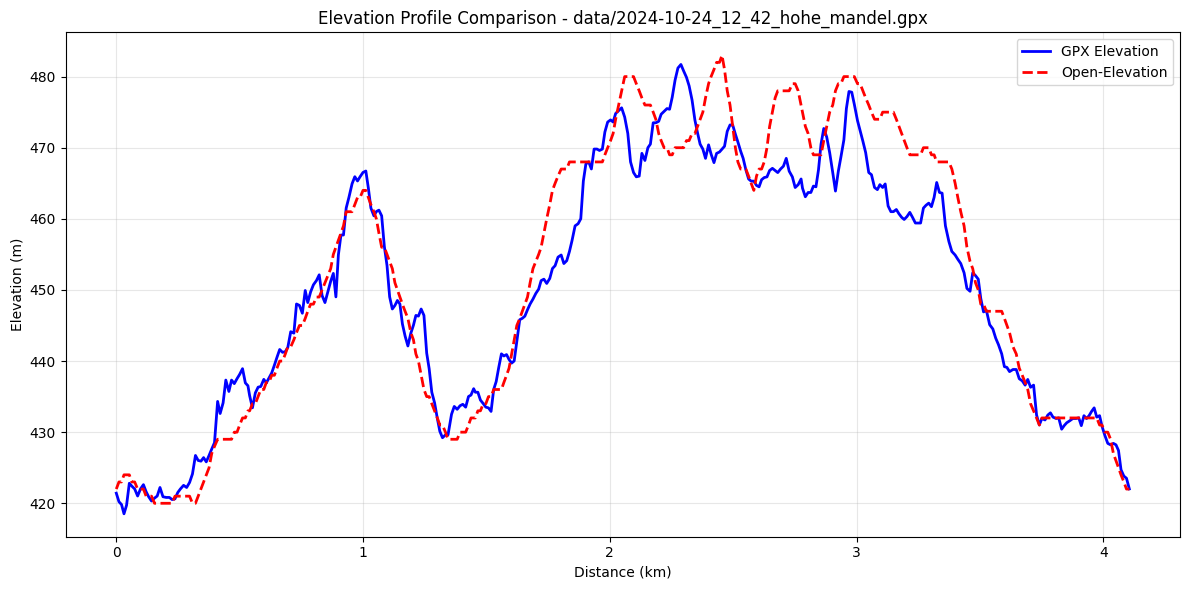

In [5]:
ElevationPlotter.plot_comparison(
	gpx_profile,
	api_openelevation_profile,
	label2="Open-Elevation",
	title=f"Elevation Profile Comparison - {gpx_file_path}"
)

# ElevationPlotter.plot_comparison(
# 	gpx_profile,
# 	api_elevation_profile,
# 	label2="Open-Streetmap",
# 	title=f"Elevation Profile Comparison - {gpx_file_path}"
# )

# ElevationPlotter.plot_comparison(
# 	api_openelevation_profile,
# 	api_elevation_profile,
# 	label1="Open-Elevation",
# 	label2="Open-Streetmap",
# 	title=f"Elevation Profile Comparison - {gpx_file_path}"
# )


## 3. Comparision with online APIs - After applying smoothing algorithm 

### Apply smoothing algorithm **LOESS V1** on the recorded data

In [6]:
from curve_smoothing.src.loess_v1 import loess
from copy import deepcopy

# convert gpx points into loess() compatible format
gpx_loess_v1_profile = deepcopy(gpx_profile)

# get smoothen elevations after applying loess_v1
gpx_loess_v1_elevations = loess(
	x=gpx_loess_v1_profile.distances,
	y=gpx_loess_v1_profile.get_elevations(),
	window=0.75,
)

gpx_loess_v1_profile.set_elevations(gpx_loess_v1_elevations)

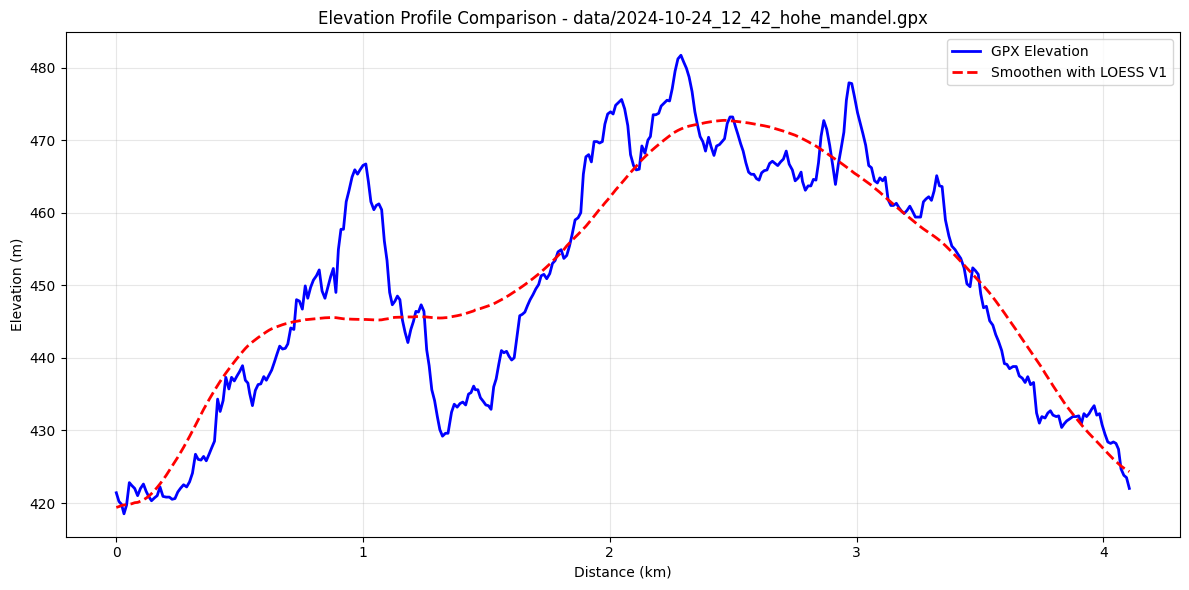

In [7]:
ElevationPlotter.plot_comparison(
	gpx_profile,
	gpx_loess_v1_profile,
	label2="Smoothen with LOESS V1",
	title=f"Elevation Profile Comparison - {gpx_file_path}"
)

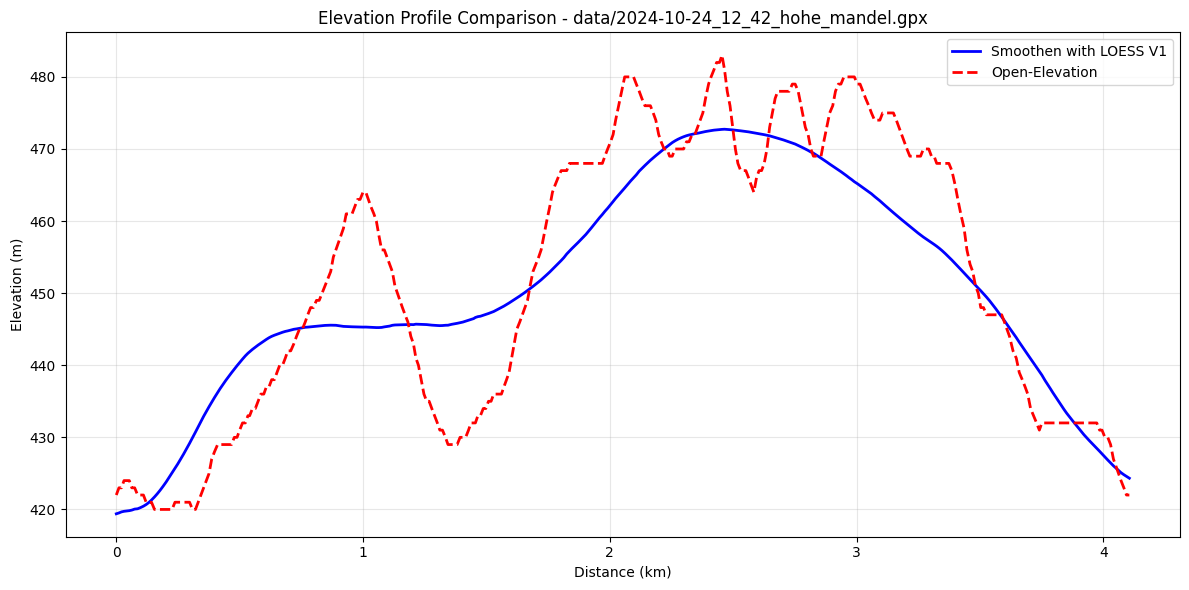

In [8]:
ElevationPlotter.plot_comparison(
	gpx_loess_v1_profile,
	api_openelevation_profile,
	label1="Smoothen with LOESS V1",
	label2="Open-Elevation",
	title=f"Elevation Profile Comparison - {gpx_file_path}"
)

### Apply smoothing algorithm **LOESS V2** on the recorded data

In [9]:
from curve_smoothing.src.loess_v2 import loess_v2
from copy import deepcopy

# convert gpx points into loess_v2() compatible format
gpx_loess_v2_profile = deepcopy(gpx_profile)

# get smoothen elevations after applying loess_v2
gpx_loess_v2_elevations = loess_v2(
	x=gpx_loess_v2_profile.distances,
	y=gpx_loess_v2_profile.get_elevations(),
)

gpx_loess_v2_profile.set_elevations(gpx_loess_v2_elevations)

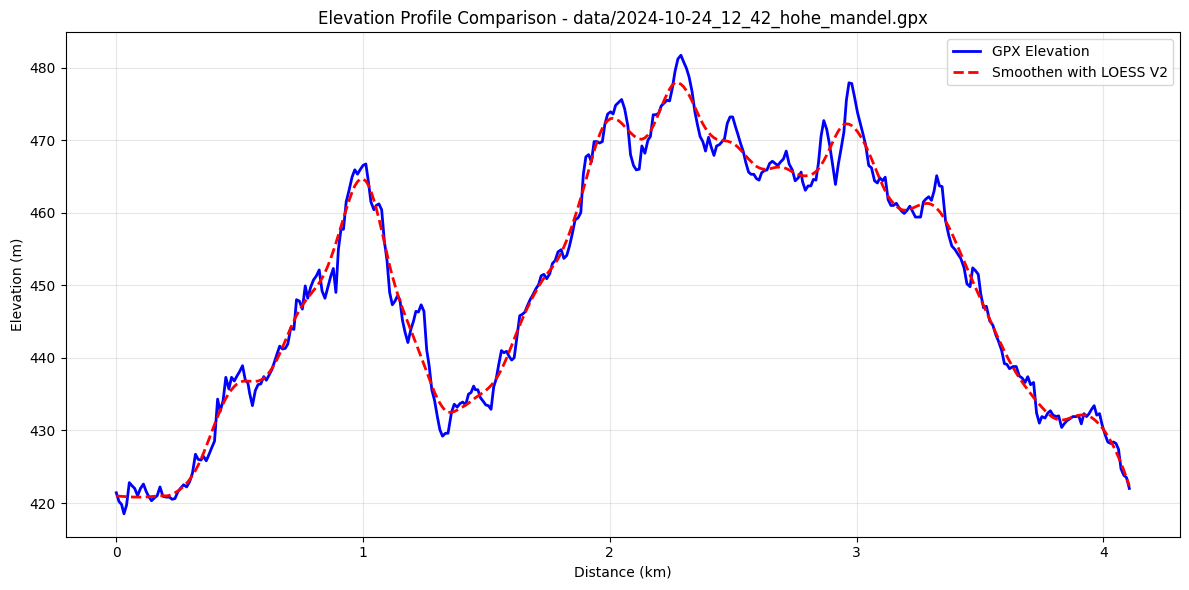

In [10]:
ElevationPlotter.plot_comparison(
	gpx_profile,
	gpx_loess_v2_profile,
	label2="Smoothen with LOESS V2",
	title=f"Elevation Profile Comparison - {gpx_file_path}"
)

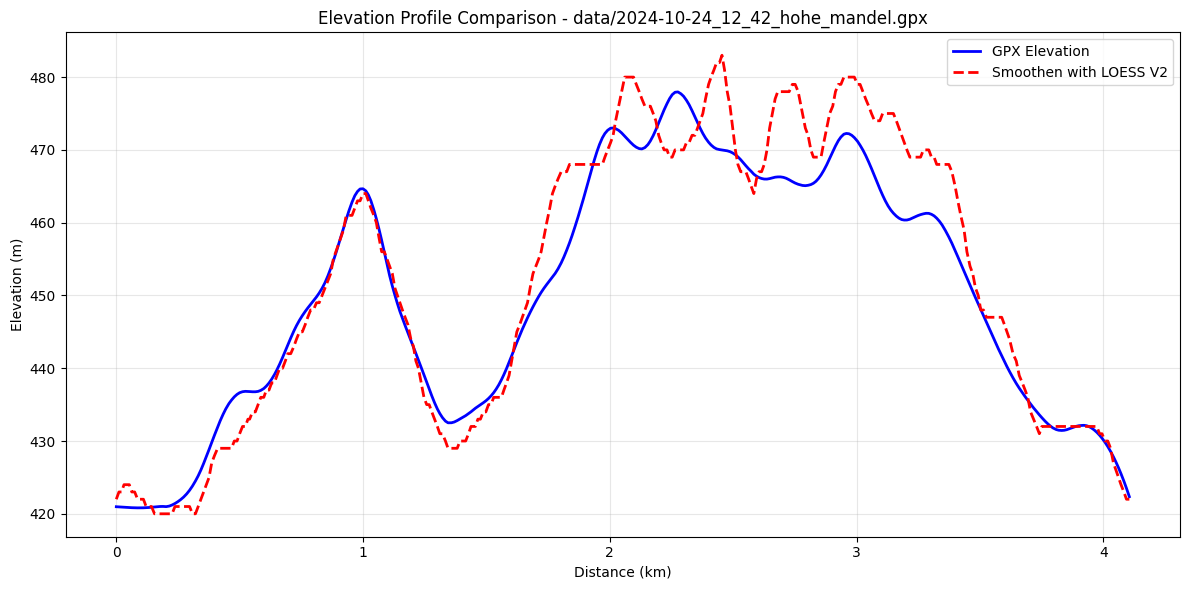

In [11]:
ElevationPlotter.plot_comparison(
	gpx_loess_v2_profile,
	api_openelevation_profile,
	label2="Smoothen with LOESS V2",
	title=f"Elevation Profile Comparison - {gpx_file_path}"
)

### Apply smoothing algorithm **spline** on the recorded data

In [12]:
from curve_smoothing.src.spline_fit import spline_fit
from copy import deepcopy

# convert gpx points into spline() compatible format
gpx_spline_profile = deepcopy(gpx_profile)

# get smoothen elevations after applying spline
gpx_spline_elevations = spline_fit(
	x=gpx_spline_profile.distances,
	y=gpx_spline_profile.get_elevations(),
)

gpx_spline_profile.set_elevations(gpx_spline_elevations)

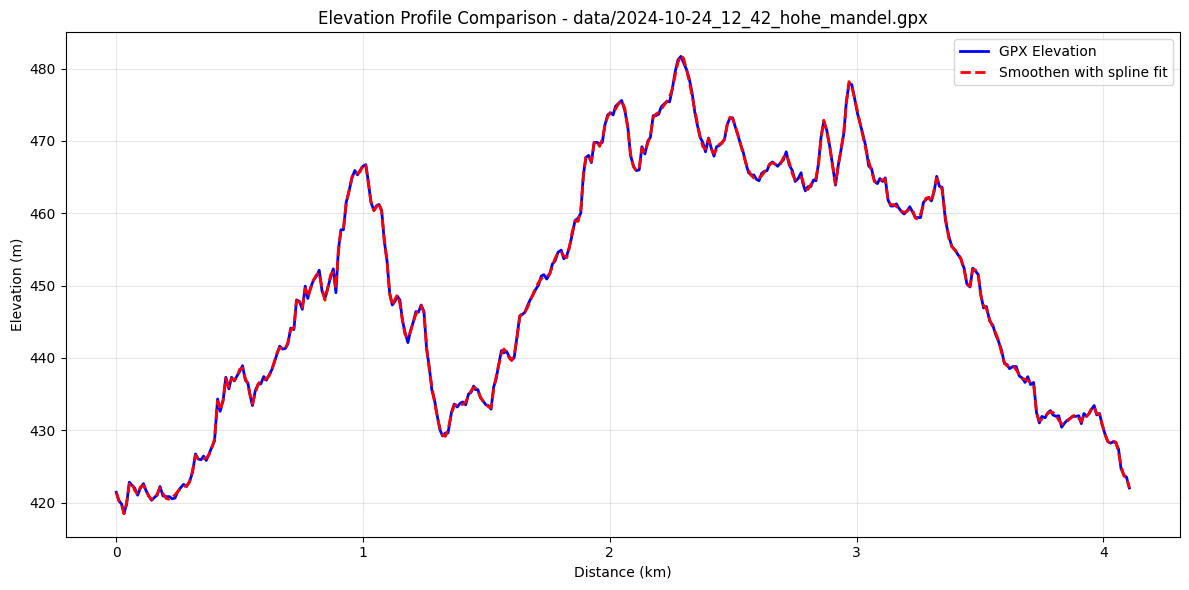

In [13]:
ElevationPlotter.plot_comparison(
	gpx_profile,
	gpx_spline_profile,
	label2="Smoothen with spline fit",
	title=f"Elevation Profile Comparison - {gpx_file_path}"
)

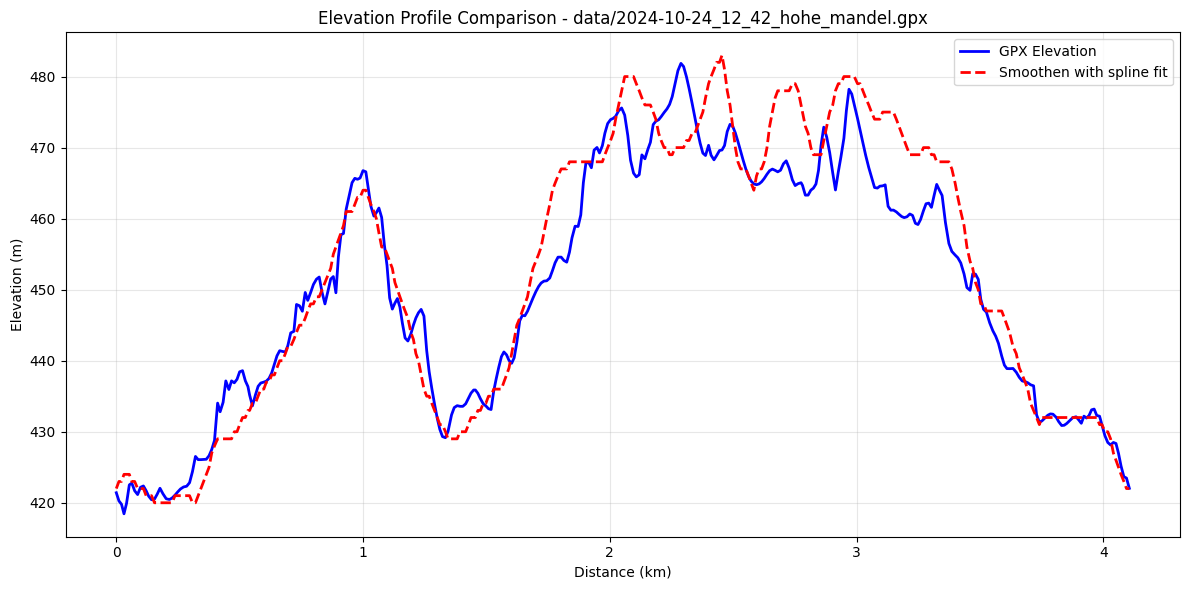

In [14]:
ElevationPlotter.plot_comparison(
	gpx_spline_profile,
	api_openelevation_profile,
	label2="Smoothen with spline fit",
	title=f"Elevation Profile Comparison - {gpx_file_path}"
)